📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       141
           1       0.77      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.79      0.72      0.74       200
weighted avg       0.80      0.81      0.80       200

🔍 Confusion Matrix:
 [[132   9]
 [ 29  30]]
🎯 ROC-AUC Score: 0.8281043394638778


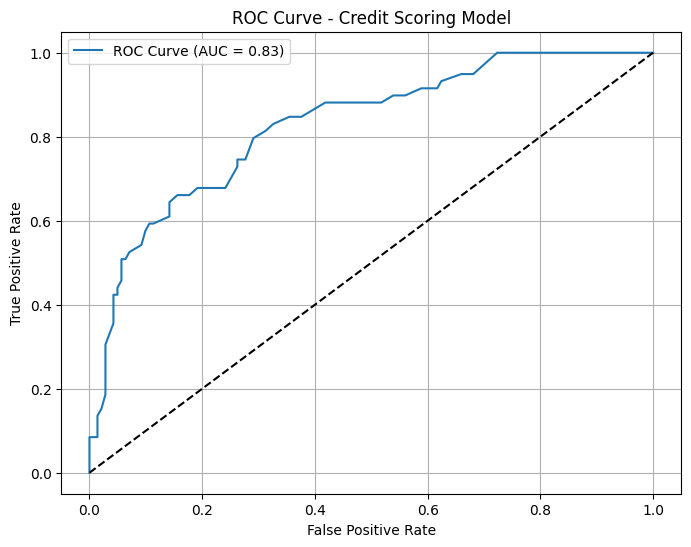

In [1]:
# 📌 Credit Scoring Model - CodeAlpha Internship
# 🔗 Dataset: German Credit Data from UCI ML Repository

# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 2: Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "ExistingCredits", "Job", "NumLiablePeople", "Telephone", "ForeignWorker", "Target"
]
df = pd.read_csv(url, sep=' ', names=columns)
df['Target'] = df['Target'] - 1  # 1 = Good, 2 = Bad => 0 = Good, 1 = Bad

# Step 3: Data Preprocessing
# Label encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
X = df.drop("Target", axis=1)
y = df["Target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train Model (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Scoring Model")
plt.legend()
plt.grid()
plt.show()
